# Import library

In [466]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from collections import Counter
from sklearn.svm import SVR
%matplotlib inline

# Get the Data

## Load data

In [467]:
from google.colab import drive
drive.mount('/content/drive')
train_df= pd.read_csv('/content/drive/MyDrive/train.csv')
test_df= pd.read_csv('/content/drive/MyDrive/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Discover and visulaize the Data

##Data Visualisation

In [468]:
train_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [469]:
test_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
2,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
3,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39
4,12,0.23,Ideal,J,VS1,62.8,56.0,3.93,3.90,2.46


In [470]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [410]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10900 non-null  int64  
 1   carat       10900 non-null  float64
 2   cut         10900 non-null  object 
 3   color       10900 non-null  object 
 4   clarity     10900 non-null  object 
 5   depth       10900 non-null  float64
 6   table       10900 non-null  float64
 7   x           10900 non-null  float64
 8   y           10900 non-null  float64
 9   z           10900 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 851.7+ KB


In [411]:
train_df.shape

(43040, 11)

In [412]:
train_df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [413]:
test_df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
dtype: int64

In [471]:
train_df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


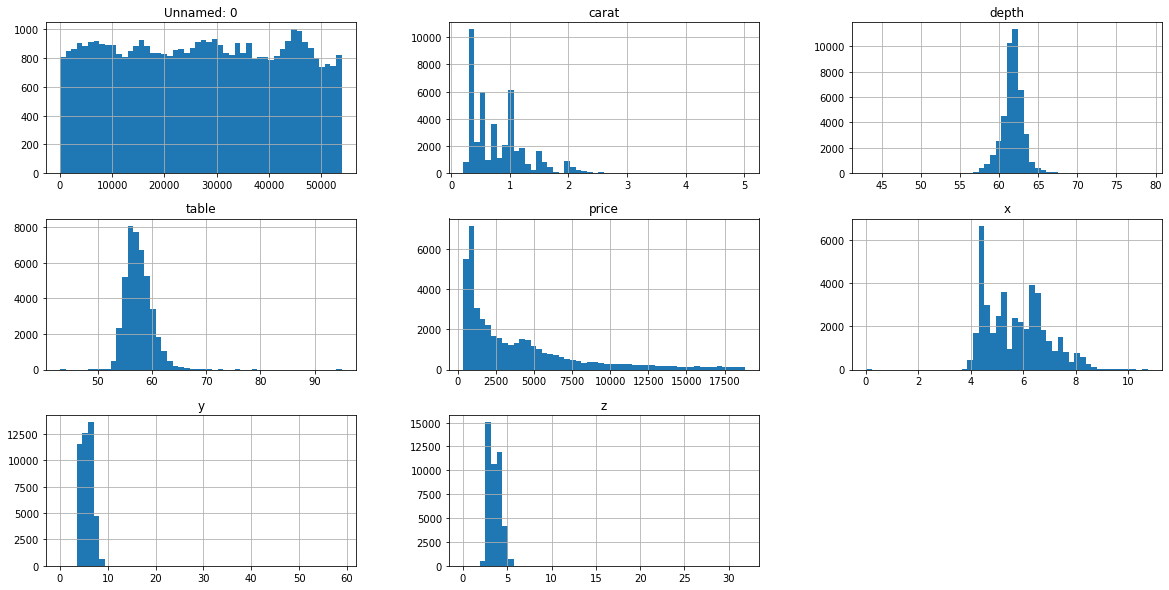

In [472]:
train_df.hist(bins=50, figsize=(20,10))
plt.show()

## Looking for correlations

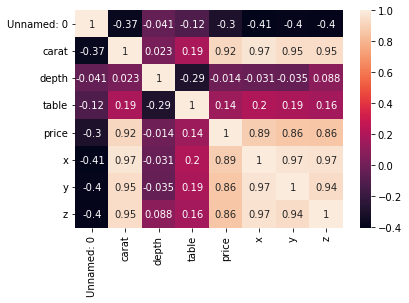

In [473]:
sns.heatmap(train_df.corr(), annot=True)
plt.show()

In [364]:
corr_matrix = train_df.corr()
corr_matrix['price'].sort_values(ascending= False)

price         1.000000
carat         0.923801
x             0.887483
y             0.863748
z             0.860625
table         0.136975
depth        -0.014393
Unnamed: 0   -0.301711
Name: price, dtype: float64

## Show outliers by boxplot


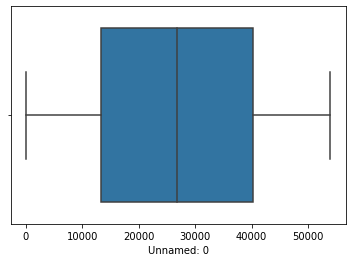

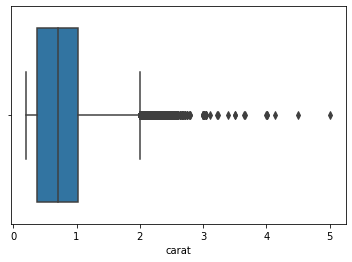

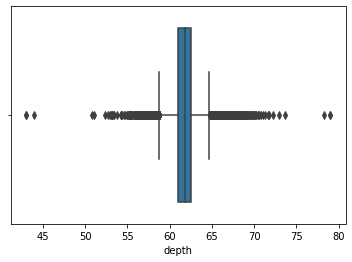

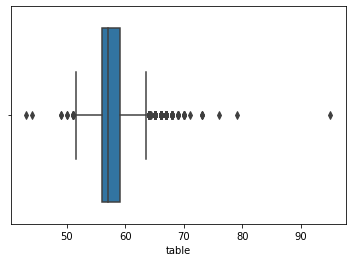

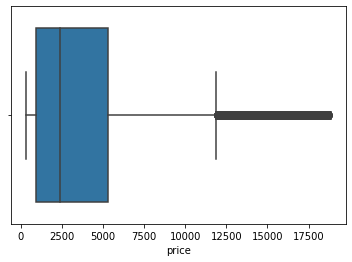

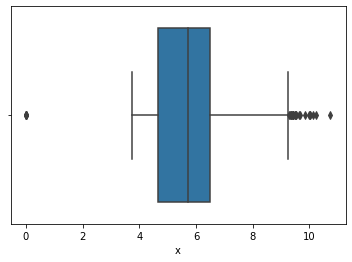

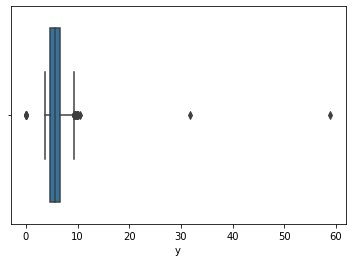

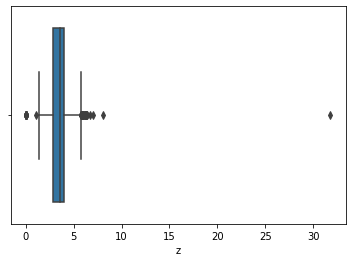

In [308]:
j=1
for j in train_df.select_dtypes(exclude=['object']):
  sns.boxplot(x=train_df[j])
  plt.show()

In [474]:
train_df=train_df.drop('Unnamed: 0', axis=1 )
test_df=test_df.drop('Unnamed: 0',axis=1)

##Remove outliers

## Remove outliers using IQR 

In [366]:
'''linear_vars = train_df.select_dtypes(include=[np.number]).columns'''

In [264]:
"""def  outliers(df , ft ):
    
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3 - Q1
    # Upper bound
    upper = Q3+1.5*IQR
    # Lower bound
    lower = Q1-1.5*IQR

    ls=df.index[(df[ft] < lower) | (df[ft] > upper)]
    return ls """

In [265]:
'''index_list=[]
for feature in linear_vars :
    index_list.extend(outliers(train_df , feature ))'''

In [266]:
'''def remove(df, ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df'''

In [267]:
'''train_df= remove(train_df , index_list)'''

## Remove zero value in x,y,z features

In [475]:
train_df=train_df.drop(train_df.index[train_df['x'] == 0],axis=0)

In [476]:
train_df= train_df.drop(train_df.index[train_df['z'] == 0],axis=0)

# remove outliers

In [477]:
train_df=train_df.drop(train_df.index[train_df['z']>8], axis =0)

In [478]:
train_df=train_df.drop(train_df.index[train_df['y']>30], axis =0)

In [479]:
train_df=train_df.drop(train_df.index[train_df['depth'] > 75], axis =0)
train_df=train_df.drop(train_df.index[train_df['depth'] < 50], axis =0)

In [480]:
train_df=train_df.drop(train_df.index[train_df['table']>80], axis =0)
train_df=train_df.drop(train_df.index[train_df['table']<50], axis =0)

In [481]:
train_df.shape

(43009, 10)

In [482]:
train_df['color'].value_counts()

G    9072
E    7716
F    7522
H    6633
D    5555
I    4294
J    2217
Name: color, dtype: int64

# Feature Selection

In [483]:
train_df['volume']=train_df['x'] * train_df['y'] * train_df['z']
train_df=train_df.drop(['x','y','z'], axis=1)

In [484]:
test_df['volume']= test_df['x'] * test_df['y'] * test_df['z']
test_df=test_df.drop(['x','y','z'], axis=1)

# Use function map to convert data

In [485]:
a = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
b = {'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0}
c = {'I1':0 , 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7 }

In [486]:
train_df['cut']=train_df['cut'].map(a)
test_df['cut']= test_df['cut'].map(a)

In [487]:
train_df['color']=train_df['color'].map(b)
test_df['color'] = test_df['color'].map(b)

In [488]:
train_df['clarity']=train_df['clarity'].map(c)
test_df['clarity']=test_df['clarity'].map(c)

In [489]:
train_df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.21,3,5,2,59.8,61.0,326,34.505856
1,0.29,3,1,3,62.4,58.0,334,46.724580
2,0.31,1,0,1,63.3,58.0,335,51.917250
3,0.24,2,0,5,62.8,57.0,336,38.693952
4,0.24,2,1,6,62.3,57.0,336,38.830870


In [490]:
corr_matrix = train_df.corr()
corr_matrix['price'].sort_values(ascending= False)

price      1.000000
volume     0.925726
carat      0.923762
table      0.136968
depth     -0.013979
cut       -0.069159
clarity   -0.156986
color     -0.176455
Name: price, dtype: float64

#Data split

In [491]:
X = train_df.drop(['price'], axis=1)
y= train_df['price']

In [492]:
X_train, X_test, y_train, y_test = train_test_split(X ,y,test_size=0.2, random_state=42)

##Train model

In [494]:
#linear regression model
train_df_lin=LinearRegression()
train_df_lin.fit(X_train,y_train)

LinearRegression()

In [495]:
y_pred_lin = train_df_lin.predict(X_test)

In [496]:
lin_mse = mean_squared_error(y_pred_lin,y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1219.036001442369

In [497]:
#Decision Tree Regressor
train_df_dt= DecisionTreeRegressor()
train_df_dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [498]:
y_pred_dt=train_df_dt.predict(X_test)

In [499]:
tree_mse = mean_squared_error(y_pred_dt,y_test)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

716.1480422957766

In [500]:
#Random Forest Regresso
train_df_Ran=RandomForestRegressor()
train_df_Ran.fit(X_train,y_train)

RandomForestRegressor()

In [501]:
y_pred_ra=train_df_Ran.predict(X_test)

In [502]:
forest_mse=mean_squared_error(y_test,y_pred_ra)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

535.8289627294638

In [503]:
#KNeighbors Regressor
train_df_KN =KNeighborsRegressor(n_neighbors=5)
train_df_KN.fit(X_train,y_train)

KNeighborsRegressor()

In [504]:
y_pred = train_df_KN.predict(X_test)

In [505]:
KN_mse = mean_squared_error(y_test,y_pred)
KN_rmse =np.sqrt(KN_mse)
KN_rmse

774.9942359806952

In [506]:
#Suport Vector  Regressor
train_df_sv = SVR()
train_df_sv.fit(X_train,y_train)

SVR()

In [507]:
y_pred = train_df_sv.predict(X_test)

In [508]:
sv_mse = mean_squared_error(y_test,y_pred)
sv_rmse = np.sqrt(sv_mse)
sv_rmse

2329.2280990252784

In [509]:
from lightgbm.sklearn import LGBMRegressor
import lightgbm as lgb

In [510]:
#LGBMRegressor()
model = lgb.LGBMRegressor()

In [511]:
model.fit(X_train,y_train)

LGBMRegressor()

In [512]:
pred = model.predict(X_test)

In [513]:
LG_mse = mean_squared_error(y_test,pred)
LG_rmse = np.sqrt(LG_mse)
LG_rmse

535.4796564846274

In [514]:
from xgboost.sklearn import XGBRegressor
import xgboost as xgb

In [515]:
param = {'objective':'reg:squarederror', 'booster':'gbtree', 'learning_rate' : 0.5,
         'reg_alpha': 10, 'reg_lambda': 10, 'random_state' : 1,
         'n_jobs' : -1}
xgb = XGBRegressor(**param)

In [516]:
xgb.fit(X_train, y_train)

XGBRegressor(learning_rate=0.5, n_jobs=-1, objective='reg:squarederror',
             random_state=1, reg_alpha=10, reg_lambda=10)

In [517]:
xgb_pred = xgb.predict(X_test)

In [518]:
xgb_mse = mean_squared_error(y_test,xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

574.7848105791846

In [519]:
param_grid = { 
    'model__n_estimators': [10,20, 30],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth' : [4,5,6,7,8]}
grid_search = GridSearchCV(model,param_grid,cv = 10, scoring = 'neg_mean_squared_error',return_train_score = True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LGBMRegressor(),
             param_grid={'model__max_depth': [4, 5, 6, 7, 8],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__n_estimators': [10, 20, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [520]:
grid_search.best_params_

{'model__max_depth': 4,
 'model__max_features': 'auto',
 'model__n_estimators': 10}

In [521]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

554.413601066994 {'model__max_depth': 4, 'model__max_features': 'auto', 'model__n_estimators': 10}
554.413601066994 {'model__max_depth': 4, 'model__max_features': 'auto', 'model__n_estimators': 20}
554.413601066994 {'model__max_depth': 4, 'model__max_features': 'auto', 'model__n_estimators': 30}
554.413601066994 {'model__max_depth': 4, 'model__max_features': 'sqrt', 'model__n_estimators': 10}
554.413601066994 {'model__max_depth': 4, 'model__max_features': 'sqrt', 'model__n_estimators': 20}
554.413601066994 {'model__max_depth': 4, 'model__max_features': 'sqrt', 'model__n_estimators': 30}
554.413601066994 {'model__max_depth': 4, 'model__max_features': 'log2', 'model__n_estimators': 10}
554.413601066994 {'model__max_depth': 4, 'model__max_features': 'log2', 'model__n_estimators': 20}
554.413601066994 {'model__max_depth': 4, 'model__max_features': 'log2', 'model__n_estimators': 30}
554.413601066994 {'model__max_depth': 5, 'model__max_features': 'auto', 'model__n_estimators': 10}
554.413601

In [522]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [ ]:
scores = cross_val_score(grid_search, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
model_rmse_scores = np.sqrt(-scores)

In [54]:
display_scores(model_rmse_scores)

Scores: [742.70901541 742.12868474 750.14924519 684.71008304 766.5247859
 732.14393669 707.80794557 752.56160245 713.43503818 727.0776749 ]
Mean: 731.9248012057917
Standard deviation: 23.134069482219378


# Evaluate the System on the Test Set

In [60]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

602.3554349839433

In [61]:
prediction=final_model.predict(test_df)

In [62]:
prediction

array([ 184.02017,  432.56348,  377.49225, ..., 2715.5723 , 2717.1572 ,
       2484.7432 ], dtype=float32)

In [63]:
da=pd.read_csv('/content/drive/MyDrive/test.csv')
index_col=da[['Unnamed: 0']]

In [64]:
index_col['price'] = prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
index_col.to_csv('submission.csv', index=False)